In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
print(df.shape)
df.head(5)

(962, 2)


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

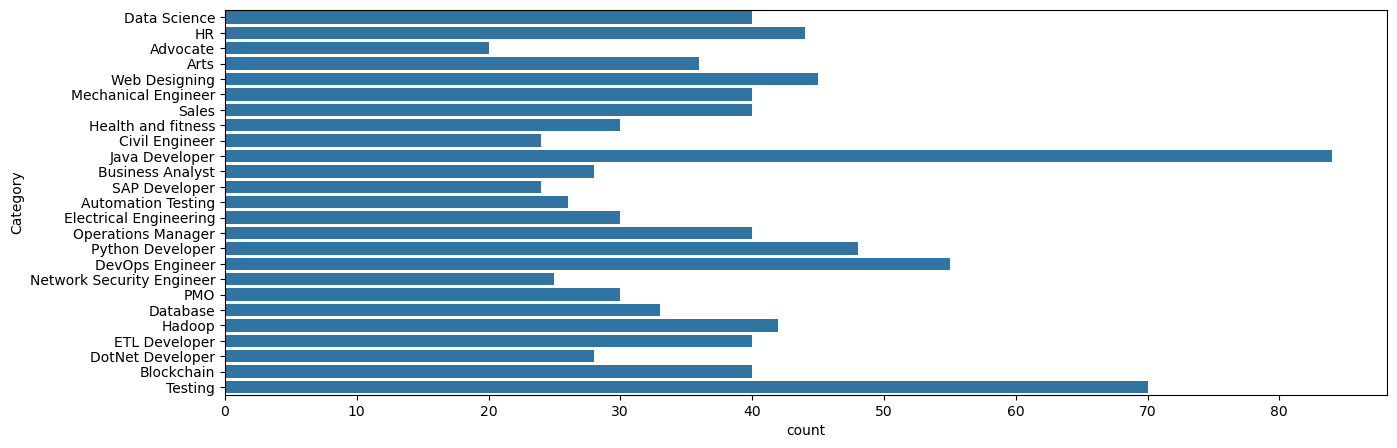

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

([<matplotlib.patches.Wedge at 0x186845206b0>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

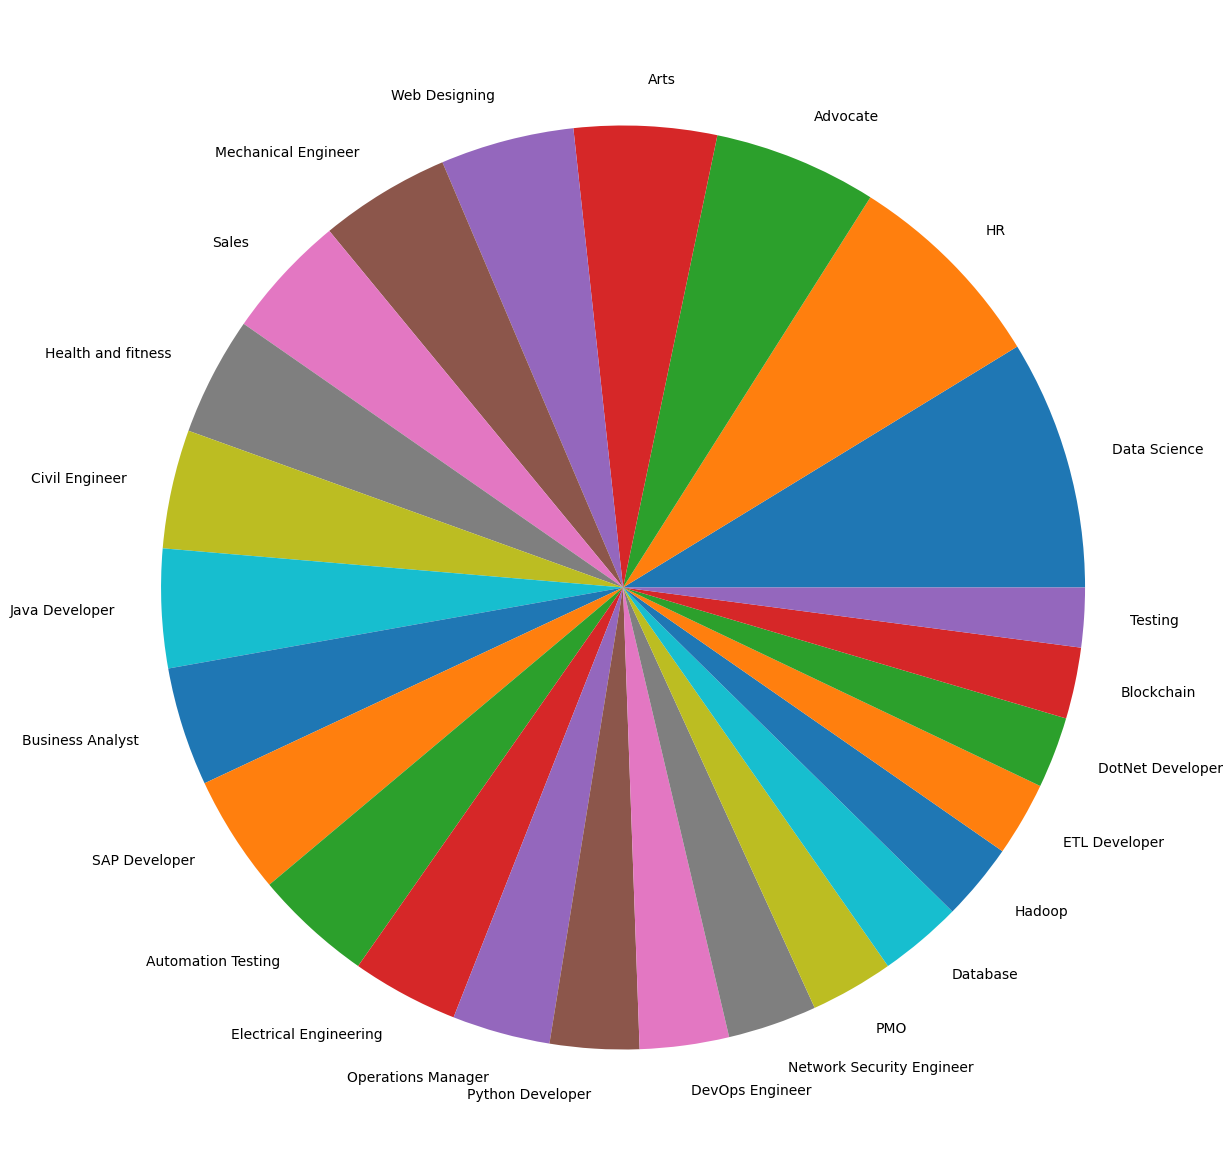

In [6]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,15))
plt.pie(counts,labels=labels)

# Cleaning Data

In [8]:
import re 
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

special_char = [ "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "-", "_", "=", "+",
    "[", "]", "{", "}", "|", "\\", ";", ":", "'", "\"", ",", "<", ">", ".",
    "/", "?", "~", "`"]

def cleaning(text):
    # removing link
    cleanedText = re.sub('http\S+\s','',text)

    # removing mails
    cleanedText = re.sub('\S+@\S+','',cleanedText)
    
    # removing hashtags
    cleanedText = re.sub('#\S+','',cleanedText)

    # removing HTML tags
    cleanedText = re.sub(r"<.*?>",'',cleanedText)

    # removing numbers
    cleanedText = re.sub(r"\b\d+\b",'',cleanedText)
    
    # removing stopwords
    def rem_stop_words(cleanedText):
        clean = []
        word = cleanedText.split(' ')
        for w in word:
            if w not in stop_words:
                clean.append(w)
        cleanedText = " ".join(clean)        
        return cleanedText
    cleanedText = rem_stop_words(cleanedText)

    # remove /
    cleanedText = re.sub('/s+','',cleanedText)
    
    # remove special characters
    cleanedText = re.sub(r"[^a-zA-Z0-9\s]",'',cleanedText)
    
    # remove
    cleanedText= re.sub(r"\r\n",'',cleanedText)
    
    # removing extra white-space
    cleanedText = cleanedText.strip()

    return cleanedText

In [9]:
cleaning(df['Resume'][1])

'Education Details May  May  BE   UITRGPVData Scientist Data Scientist  MatelabsSkill Details Python Exprience  Less  year monthsStatsmodels Exprience   monthsAWS Exprience  Less  year monthsMachine learning Exprience  Less  year monthsSklearn Exprience  Less  year monthsScipy Exprience  Less  year monthsKeras Exprience  Less  year monthsCompany Details company  Matelabsdescription  ML Platform business professionals dummies enthusiastsA Koramangala 5th blockAchievementsTasks behind sukh sagar BengaluruIndia                               Developed deployed auto preprocessing steps machine learning mainly missing valuetreatment outlier detection encoding scaling feature selection dimensionality reductionDeployed automated classification regression modellinkedincominadityarathoreb4600b146                           Reasearch deployed time series forecasting model ARIMA SARIMAX Holtwinter andProphetWorked metafeature extracting problemgithubcomrathorologyImplemented state art research pape

In [10]:
df['Resume'] = df['Resume'].apply(cleaning)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category_le'] = le.fit_transform(df['Category'])
df.sample(3)

,Category,Resume,Category_le
697,PMO,CORE COMPETENCIES Maintain processes ensure p...,19
540,Operations Manager,KEY COMPETENCIES Multi Operations ManagementP...,18
350,Java Developer,TECHNICAL STRENGTHS Computer Language JavaJ2EE...,15


In [12]:
labeled_category = {}
name = df['Category'].unique()
no = df['Category_le'].unique()
n = len(df['Category'].unique())
for i in range(0,n):
    labeled_category[str(no[i])] = name[i] 
labeled_category

{'6': 'Data Science',
 '12': 'HR',
 '0': 'Advocate',
 '1': 'Arts',
 '24': 'Web Designing',
 '16': 'Mechanical Engineer',
 '22': 'Sales',
 '14': 'Health and fitness',
 '5': 'Civil Engineer',
 '15': 'Java Developer',
 '4': 'Business Analyst',
 '21': 'SAP Developer',
 '2': 'Automation Testing',
 '11': 'Electrical Engineering',
 '18': 'Operations Manager',
 '20': 'Python Developer',
 '8': 'DevOps Engineer',
 '17': 'Network Security Engineer',
 '19': 'PMO',
 '7': 'Database',
 '13': 'Hadoop',
 '10': 'ETL Developer',
 '9': 'DotNet Developer',
 '3': 'Blockchain',
 '23': 'Testing'}

# Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vctr = tfidf.fit_transform(df['Resume'])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(vctr, df['Category'], test_size=0.2, random_state=42 )

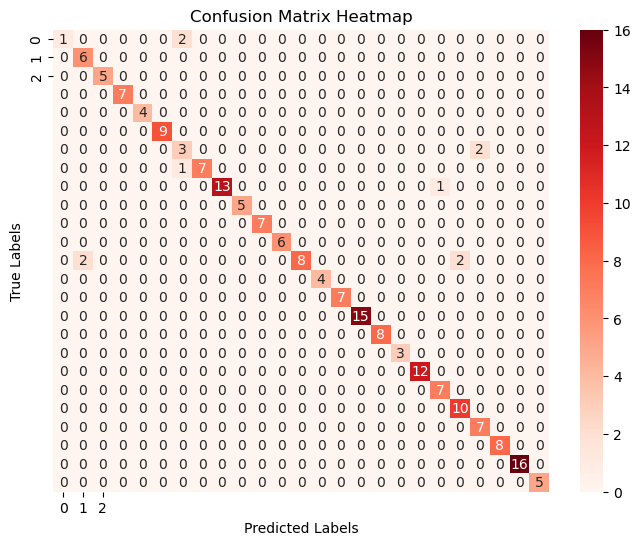

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

cm = confusion_matrix (y_test,y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

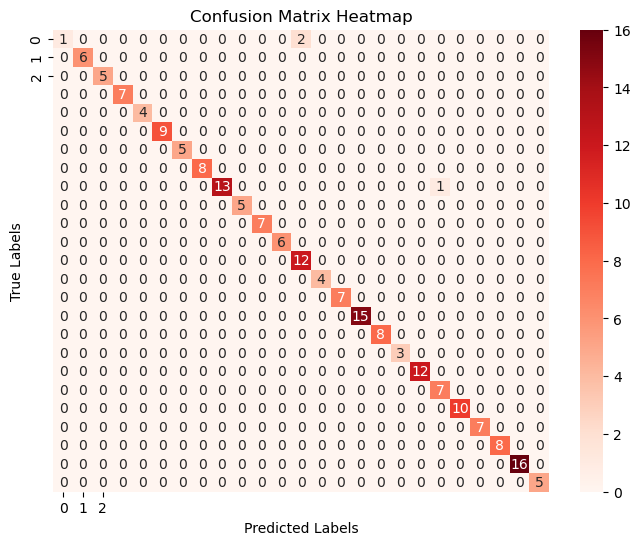

In [17]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(x_train,y_train)
y_prd = rc.predict(x_test)
accuracy_score(y_test,y_prd)
cm = confusion_matrix (y_test,y_prd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Pickle

In [19]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(rc,open('rc.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [42]:
resume ="""
"Education Details 
 BBA   lovely professional university
HR 


Skill Details 
Communication- Exprience - 6 monthsCompany Details 
company - 
description - "

"""

In [44]:
import pickle 

rc = pickle.load(open('clf.pkl','rb'))

clean_resume = cleaning(resume)

ip_features = tfidf.transform([clean_resume])

predicion_id = clf.predict(ip_features)[0]

task = {'6': 'Data Science',
 '12': 'HR',
 '0': 'Advocate',
 '1': 'Arts',
 '24': 'Web Designing',
 '16': 'Mechanical Engineer',
 '22': 'Sales',
 '14': 'Health and fitness',
 '5': 'Civil Engineer',
 '15': 'Java Developer',
 '4': 'Business Analyst',
 '21': 'SAP Developer',
 '2': 'Automation Testing',
 '11': 'Electrical Engineering',
 '18': 'Operations Manager',
 '20': 'Python Developer',
 '8': 'DevOps Engineer',
 '17': 'Network Security Engineer',
 '19': 'PMO',
 '7': 'Database',
 '13': 'Hadoop',
 '10': 'ETL Developer',
 '9': 'DotNet Developer',
 '3': 'Blockchain',
 '23': 'Testing'}

# namee = task.get(predicion_id, "Unknown")
print(predicion_id)

HR
